# COGS 181 - Homework 3

## 1 - Perceptron

### 1.1 Programming

In [15]:
import numpy as np
import pandas as pd
# Read data 
data = pd.read_csv('Q1_data.txt',header=None, usecols=[0,1,2,3,4])

# Split up X and Y
X = data.as_matrix()[:,:4]
Y = data.as_matrix()[:,-1]

# Find index for all the different classes
mask_setosa = np.where(Y == "Iris-setosa")[0]
mask_vc = np.where(Y == "Iris-versicolor")[0]

# Classify to 1 and -1 for the two classes
Y[mask_setosa] = 1
Y[mask_vc] = -1

# Find index for wanted training and testing tests
training_mask = np.append(mask_setosa[0:35], mask_vc[0:35])
testing_mask = np.append(mask_setosa[35::], mask_vc[35::])

# Split X and Y to training & testing sets
X_train = X[training_mask]
X_test = X[testing_mask]
Y_train = Y[training_mask]
Y_test = Y[testing_mask]

print "Done"



Done


Perceptron learn done
Trained W:
[-0.02816965019965756 1.352961719638385 -1.7936396537196153
 0.0982208788494281]
Trained b: 0.867752509754


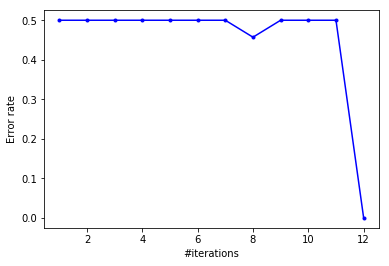

In [22]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline 

# Returns the predicted values of our classifier
# X is Nx4
# w is 4x1
# b is scalar
def f(X,w,b):
    
    # Our classifier
    values = np.dot(X,w) + b
    # Map all calculated values to -1 or 1 given value >= 0    
    mapper = lambda x: [-1,1][x >= 0]
    # Map to -1,1
    vectorizer = np.vectorize(mapper)
    predictions = vectorizer(values)
    return predictions

def error(X,Y,w,b):
    predictions = f(X,w,b)
    # error can also be calculated manually by
    correct = (predictions == Y).sum()
    accuracy = correct / float(len(X))
    error = 1 - accuracy
    # Can be calulated with sklearn function as well...
    # error = 1- accuracy_score(Y.astype(int), predictions)
    return error

# X Nx4
# Y Nx1
# w 4x1
# b scalar
def perceptron_learn(X, Y, w, b, max_iterations):
    ws = []
    bs = []
    error_rate = 1
    it = 0
    errors = []
    while error_rate > 0 and it < max_iterations:
        error_rate = error(X,Y,w,b)
        errors.append(error_rate)
        it = it + 1
        ws.append(w)
        bs.append(b)
        # Select a random point
        i = random.randrange(0, len(X))
        # Calculate prediction
        prediction = f(X[i], w, b)
        if prediction == Y[i]:
            continue
        else:
            w = w + lam*(Y[i] - prediction)*X[i]
            b = b + lam*(Y[i] - prediction)

    return ws,bs,errors

w = np.array([random.random() for i in range(len(X[0]))])
b = random.random()
lam = 0.1

ws ,bs ,e = perceptron_learn(X_train,Y_train, w, b, 1000)
print "Perceptron learn done"
w = ws[-1]
b = bs[-1]

plt.plot([x for x in range(1,len(e)+1)], e, "-b.", label="Error rate")
plt.xlabel("#iterations")
plt.ylabel("Error rate")
print "Trained W:\n", w
print "Trained b:", b

### 1.2 - Decision boundary
Given in handwritten notes

### 1.3 - Test

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F Value: 1.0


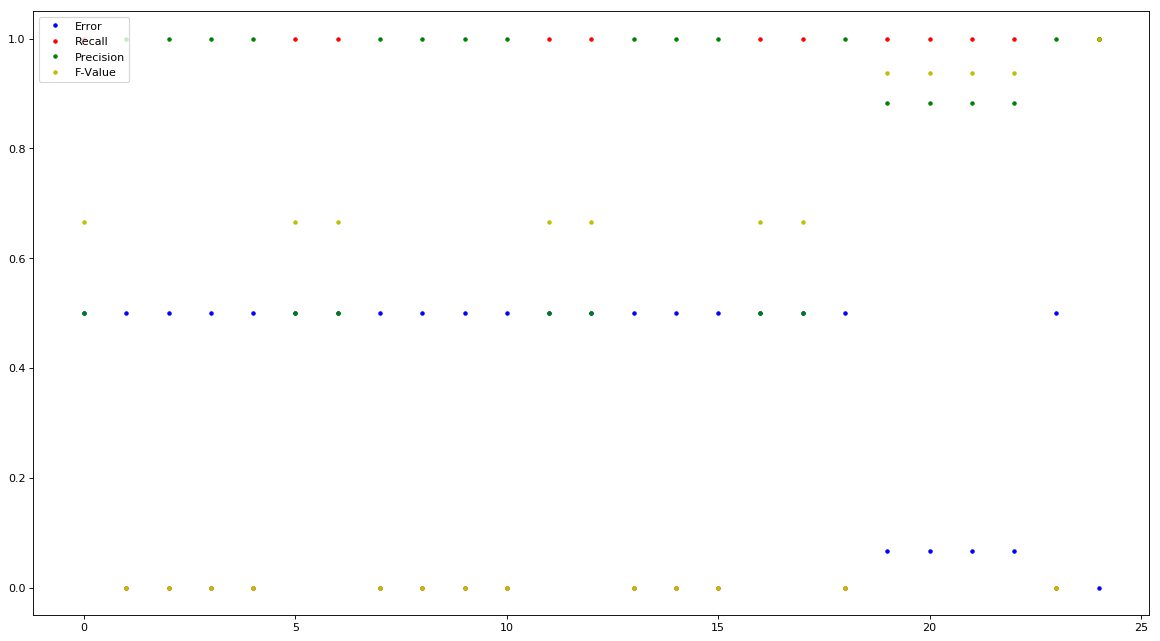

In [3]:
# #correct_predictions / #predictions
def get_accuracy(Y, predictions):
    assert Y.shape == predictions.shape
    correct_predictions = np.equal(Y, predictions)
    correct = sum(correct_predictions)
    
    return correct / float(len(predictions))

# #true_positives / (#true_positives + #false_positives)
def get_precision(Y, predictions):
    assert Y.shape == predictions.shape
    true_positives = get_true_positives(Y, predictions)
    all_positives =  (predictions == 1).sum()
    if all_positives == 0:
        return 1
    return true_positives / float(all_positives)

def get_true_positives(Y, predictions):
    TP = np.logical_and(predictions == 1, Y == 1).sum()
    return TP
    

# #true_positives / #positives_in_test_set
def get_recall(Y, predictions):
    assert Y.shape == predictions.shape
    TP = get_true_positives(Y, predictions)
    positives_in_Y = (Y==1).sum()
    return TP / float(positives_in_Y)
    
def get_f_value(precision, recall):
    return 2 * precision * recall / float(precision + recall)

def plot_statistics(Y, X, predict, ws, bs):
    errors = []
    precisions = []
    recalls = []
    f_values = []
    errors = []

    for i in range(len(ws)):
        w = ws[i]
        b = bs[i]

        predictions = predict(X, w, b)
        error = 1 - get_accuracy(Y, predictions)
        precision = get_precision(Y, predictions)
        recall = get_recall(Y, predictions)
        f_value = get_f_value(precision, recall)
        
        errors.append(error)
        precisions.append(precision)
        recalls.append(recall)
        f_values.append(f_value)
    x_axis = range(len(ws))
    fig=plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(x_axis, errors, ".b", label="Error")
    plt.plot(x_axis, recalls, ".r", label="Recall")
    plt.plot(x_axis, precisions, ".g", label="Precision")
    plt.plot(x_axis, f_values, ".y", label="F-Value")
    plt.legend()

def print_stats(Y, predictions):
    accuracy = get_accuracy(Y, predictions)
    precision =  get_precision(Y, predictions)
    recall = get_recall(Y, predictions)
    f_value = get_f_value(precision, recall)
    print "Accuracy:", accuracy
    print "Precision:", precision
    print "Recall:", recall
    print "F Value:", f_value


predictions = f(X_test, w, b)
print_stats(Y_test, predictions)
plot_statistics(Y_test, X_test, f, ws, bs)


## 2 - Logistic Regression 1

Given in handwritten notes

## 3 - Logistic Regression 2

In [4]:
data = np.loadtxt('Q3_data.txt',
                  delimiter=',',
                  converters={-1: lambda s: {b'Iris-versicolor': 0,
                                             b'Iris-virginica': 1}[s]
                  })
Y = data[:,4]
X = data[:, [0,1,2,3]]


mask_0 = np.where(Y == 0)[0]
mask_1 = np.where(Y == 1)[0]

# Find index for wanted training and testing tests
testing_mask = np.append(mask_setosa[0:15], mask_vc[0:15])
training_mask = np.append(mask_setosa[15::], mask_vc[15::])

# Split X and Y to training & testing sets
X_train = X[training_mask]
X_test = X[testing_mask]
Y_train = Y[training_mask]
Y_test = Y[testing_mask]

len(X_train)

70

In [5]:
from math import exp, log
from matplotlib.legend_handler import HandlerLine2D
# Sigmoid function
# x_i = 4x1
# w   = 4x1
# b   = scalar
def P(x_i, w, b):
    assert x_i.shape == (4,), "X shape has to be 4x1. Was {}, {}".format(x_i.shape, x_i)
    assert w.shape == (4,), "W shape has to be 4x1"
    
    upper = np.dot(w, x_i.T) + b
    res = 1 / float(( 1 + exp(-upper)))
    return res

def predict(X,w,b):
    return np.asarray([[0,1][P(x_i, w, b) >= 0.5] for x_i in X])


# Loss function
def loss(Y, X, w, b):
    assert X[0].shape == (4,), "X shape is supposed to be (4,). it was: {0}".format(X[0].shape)
    res = 0
    for i in range(len(X)):
        p_i = P(X[i], w, b)
        res += Y[i] * log(p_i) + (1 - Y[i]) * log(1 - p_i + 0.000000001)
    return res

def gradient_descent(X, Y, w ,b, alpha, max_iterations):
    # Validate parameters
    m = len(X)
    n = len(w)
    assert X.shape == (m,n)
    assert Y.shape == (m,)
    assert w.shape == (n,)
    
    # Variables to track w's, b's, losses
    it = 0
    losses = []
    ws = []
    bs = []
    for i in range(max_iterations):
        # Calulate predict values
        y_predict = predict(X, w, b)
        
        # Find dw, db
        dw = np.dot(X.T, y_predict - Y )
        db = float((y_predict - Y).sum())
        assert dw.shape == (n,)
        
        # Update w, b
        w = w - alpha * dw
        b = b - alpha * db
        
        # Record values
        losses.append(loss(Y, X, w, b))
        ws.append(w)
        bs.append(b)
        it += 1
    return losses, ws, bs

w = np.array([random.random() for x in range(len(X_train[0]))])
b = random.random()
losses, ws, bs = gradient_descent(X_train, Y_train, w, b, 0.001, 450)
print "W:", ws[-1]
print "B:", bs[-1]


W: [-1.08229593 -0.37491066  1.2339429   0.92939273]
B: 0.203415225806


Final loss: -29.3565085786


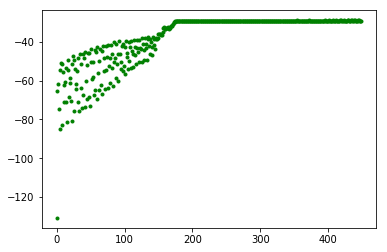

In [9]:
plt.plot(range(0,len(losses)), losses, "g.")
print "Final loss:", losses[-1]

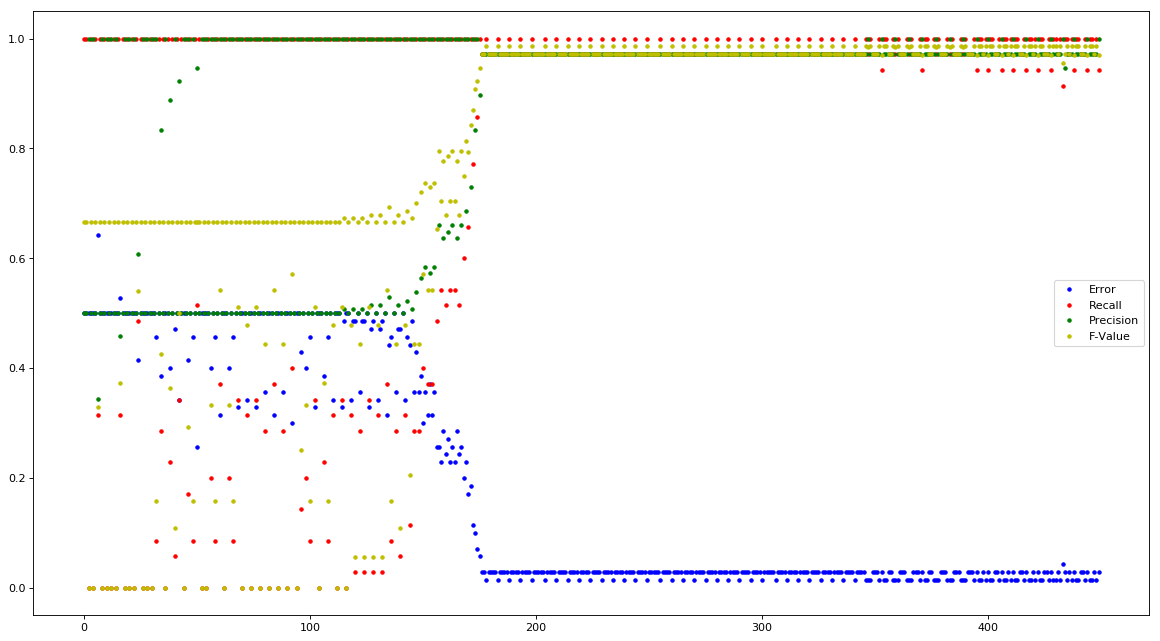

In [10]:
plot_statistics(Y_train,X_train, predict, ws ,bs)


## 3.3 - Decision Boundary

The decision boundary is given from $p_i$ when it is below / above 0.5

That is $$ p_i >= 0.5$$ 

This is when $$ w^T X_i + b = 0 $$

If we plug in the values of $w$ from the training into this equation, we can derive the decision boundary as a hyperplane

## 3.4 - Test

In [11]:
predictions = predict(X_test, ws[-1], bs[-1])
accuracy = get_accuracy(Y_test, predictions)
precision =  get_precision(Y_test, predictions)
recall = get_recall(Y_test, predictions)
f_value = get_f_value(precision, recall)
print "Accuracy:", accuracy
print "Precision:", precision
print "Recall:", recall
print "F Value:", f_value

Accuracy: 0.9
Precision: 0.833333333333
Recall: 1.0
F Value: 0.909090909091


In [13]:
Y[0].shape

()